# Project 1 (Due Nov 13)

The goal of the first project is to non-parametrically model some phenomenon of interest, and generate sequences of values. There are six options below:

- Chordonomicon: 680,000 chord progressions of popular music songs. Create a chord generator, similar to what we did with Bach in class, but for a particular artist or genre. (https://github.com/spyroskantarelis/chordonomicon)
- Financial Time series, S&P500 Stocks: There are 500 time series here. Model how individual time series adjust over time, either together or separately. (https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks)
- MIT-BIT Arrythmia Database: Arrythmia is an abnormal heart rhythm. This is a classic dataset that a day of ECG time series measurements for 4,000 patients. (https://www.physionet.org/content/mitdb/1.0.0/)
- Ukraine conflict monitor: The ACLED Ukraine Conflict Monitor provides near real-time information on the ongoing war in Ukraine, including an interactive map, a curated data file, and weekly situation updates Ukraine Conflict Monitor, maintained by the Armed Conflict Location & Event Data Project, starting in 2022, including battles, explosions/remote violence, violence against civilians, protests, and riots:
https://acleddata.com/monitor/ukraine-conflict-monitor
- SIPRI Arms Trade: The SIPRI Arms Transfers Database is a comprehensive public resource tracking all international transfers of major conventional arms from 1950 to the present. For each deal, information includes: number ordered, supplier/recipient identities, weapon types, delivery dates, and deal comments. The database can address questions about: who are suppliers and recipients of major weapons, what weapons have been transferred by specific countries, and how supplier-recipient relationships have changed over time.
https://www.sipri.org/databases/armstransfers
- Environmental Protection Agency data: The EPA, in general, has excellent data on the release of toxic substances, and I also tracked down air quality and asthma. You can put these together to look at how changes in toxic release correlate with air quality and respiratory disease over time:
https://www.epa.gov/data
https://www.epa.gov/toxics-release-inventory-tri-program/tri-toolbox
https://www.cdc.gov/asthma/most_recent_national_asthma_data.htm
https://www.earthdata.nasa.gov/topics/atmosphere/air-quality/data-access-tools

If you have other data sources that you're interested in, I am willing to consider them, as long as they lend themselves to an interesting analysis.

Submit a document or notebook that clearly addresses the following:
1. Describe the data clearly -- particularly any missing data that might impact your analysis -- and the provenance of your dataset. Who collected the data and why? (10/100 pts)
2. What phenomenon are you modeling? Provide a brief background on the topic, including definitions and details that are relevant to your analysis. Clearly describe its main features, and support those claims with data where appropriate. (10/100 pts)
3. Describe your non-parametric model (empirical cumulative distribution functions, kernel density function, local constant least squares regression, Markov transition models). How are you fitting your model to the phenomenon to get realistic properties of the data? What challenges did you have to overcome? (15/100 pts)
4. Either use your model to create new sequences (if the model is more generative) or bootstrap a quantity of interest (if the model is more inferential). (15/100 pts)
5. Critically evaluate your work in part 4. Do your sequences have the properties of the training data, and if not, why not? Are your estimates credible and reliable, or is there substantial uncertainty in your results? (15/100 pts)
6. Write a conclusion that explains the limitations of your analysis and potential for future work on this topic. (10/100 pts)

In addition, submit a GitHub repo containing your code and a description of how to obtain the original data from the source. Make sure the code is commented, where appropriate. Include a .gitignore file. We will look at your commit history briefly to determine whether everyone in the group contributed. (10/100 pts)

In class, we'll briefly do presentations and criticize each other's work, and participation in your group's presentation and constructively critiquing the other groups' presentations accounts for the remaining 15/100 pts.


In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('trade-register.csv', encoding='latin-1', skiprows = 11)

In [4]:
data

,Recipient,Supplier,Year of order,,Number ordered,.1,Weapon designation,Weapon description,Number delivered,.2,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
0,Afghanistan,Turkiye,2007.0,NaN,24.0,NaN,M-114 155mm,towed gun,24.0,NaN,2007,Second hand,Second-hand; aid,0.20,4.80,4.80
1,Afghanistan,United States,2004.0,?,188.0,?,M-113,armoured personnel carrier,188.0,?,2005,Second hand,Second-hand; aid; M-113A2 version; incl 15 M-5...,0.10,18.80,18.80
2,Afghanistan,United States,2016.0,NaN,53.0,NaN,S-70 Black Hawk,transport helicopter,53.0,?,2017; 2018; 2019; 2020,Second hand but modernized,Second-hand UH-60A modernized to UH-60A+ befor...,4.29,227.37,227.37
3,Afghanistan,Soviet Union,1973.0,?,100.0,?,T-62,tank,100.0,?,1975; 1976,New,NaN,1.80,180.00,180.00
4,Afghanistan,Soviet Union,1978.0,?,500.0,?,T-55,tank,500.0,?,1979; 1980; 1981; 1982; 1983; 1984; 1985; 1986...,Second hand,Second-hand; aid,0.50,250.00,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28345,Zimbabwe,China,2004.0,?,10.0,?,Type-85,armoured personnel carrier,10.0,?,2004,New,NaN,0.30,3.00,3.00
28346,Zimbabwe,China,2004.0,?,5.0,?,Type-89/ZSD-89,armoured personnel carrier,5.0,?,2004,New,ARV version,0.30,1.50,1.50
28347,Zimbabwe,Soviet Union,1975.0,?,15.0,?,T-34-85,tank,15.0,?,1975,Second hand,Second-hand; supplier uncertain,0.38,5.70,5.70
28348,Zimbabwe,Ukraine,2005.0,NaN,6.0,NaN,AI-25,turbofan,6.0,NaN,2005,New,For 6 K-8 trainer aircraft from China,0.60,3.60,3.60


In [5]:
data = data.drop(data.columns[[3, 5, 9]], axis=1)

In [6]:
data.head()

,Recipient,Supplier,Year of order,Number ordered,Weapon designation,Weapon description,Number delivered,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
0,Afghanistan,Turkiye,2007.0,24.0,M-114 155mm,towed gun,24.0,2007,Second hand,Second-hand; aid,0.20,4.80,4.80
1,Afghanistan,United States,2004.0,188.0,M-113,armoured personnel carrier,188.0,2005,Second hand,Second-hand; aid; M-113A2 version; incl 15 M-5...,0.10,18.80,18.80
2,Afghanistan,United States,2016.0,53.0,S-70 Black Hawk,transport helicopter,53.0,2017; 2018; 2019; 2020,Second hand but modernized,Second-hand UH-60A modernized to UH-60A+ befor...,4.29,227.37,227.37
3,Afghanistan,Soviet Union,1973.0,100.0,T-62,tank,100.0,1975; 1976,New,NaN,1.80,180.00,180.00
4,Afghanistan,Soviet Union,1978.0,500.0,T-55,tank,500.0,1979; 1980; 1981; 1982; 1983; 1984; 1985; 1986...,Second hand,Second-hand; aid,0.50,250.00,250.00


In [7]:
# Lets look at the number of missing values in each column

data.isnull().sum()

Recipient                            2
Supplier                             0
Year of order                        0
Number ordered                     110
Weapon designation                   2
Weapon description                   2
Number delivered                     2
Year(s) of delivery                  2
status                               2
Comments                          5179
SIPRI TIV per unit                   4
SIPRI TIV for total order            4
SIPRI TIV of delivered weapons       4
dtype: int64

In [8]:
data[data["SIPRI TIV of delivered weapons"].isna()]

,Recipient,Supplier,Year of order,Number ordered,Weapon designation,Weapon description,Number delivered,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
24138,Thailand,Ukraine,2008.0,14.0,BTR-3,armoured personnel carrier,13.0,2010; 2012,New,Part of THB4b ($120 m) deal (for 96 BTR-3 in s...,NaN,NaN,NaN
24139,NaN,0.25,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26821,United Nations**,Israel,2015.0,3.0,Hermes-900,UAV,3.0,2016,New,3-year lease; for use with UN peacekeeping for...,NaN,NaN,NaN
26822,NaN,3,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data = data.drop([24139, 26822], axis=0)

In [10]:
data[data["SIPRI TIV of delivered weapons"].isna()]

,Recipient,Supplier,Year of order,Number ordered,Weapon designation,Weapon description,Number delivered,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
24138,Thailand,Ukraine,2008.0,14.0,BTR-3,armoured personnel carrier,13.0,2010; 2012,New,Part of THB4b ($120 m) deal (for 96 BTR-3 in s...,NaN,NaN,NaN
26821,United Nations**,Israel,2015.0,3.0,Hermes-900,UAV,3.0,2016,New,3-year lease; for use with UN peacekeeping for...,NaN,NaN,NaN


In [11]:
#show all weapon decsriptions that are UAV

data[data["Weapon description"] == "UAV"]


,Recipient,Supplier,Year of order,Number ordered,Weapon designation,Weapon description,Number delivered,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
31,Afghanistan,United States,2015.0,65.0,ScanEagle,UAV,65.0,2016; 2017; 2018,New,$71 m deal,0.04,2.60,2.60
32,Afghanistan,United States,2018.0,35.0,ScanEagle,UAV,35.0,2019,New,$58 m deal (incl operational support),0.04,1.40,1.40
33,Afghanistan,United States,2017.0,5.0,ScanEagle,UAV,5.0,2018,New,$19.6 m deal,0.04,0.20,0.20
154,African Union**,Israel,2017.0,3.0,Aerostar,UAV,3.0,2018,New,For use by AU peacekeeping forces in Somalia; ...,0.10,0.30,0.30
321,Algeria,UAE,2013.0,5.0,Yabhon Flash-20,UAV,5.0,2018; 2019,New,Possibly assembled/produced under licence in A...,3.25,16.25,16.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27191,unknown recipient(s),Israel,2015.0,2.0,Hermes-900,UAV,2.0,2016,New,Part of $70 m deal; recipient is Latin America...,3.00,6.00,6.00
27473,Venezuela,Iran,2007.0,12.0,Mohajer,UAV,12.0,2012; 2013,New,Probably Mohajer-3 version; Venezuelan designa...,0.10,1.20,1.20
27683,Viet Nam,United States,2019.0,6.0,ScanEagle,UAV,6.0,2022,New,'Maritime Security Initiative' aid; for coast ...,0.04,0.24,0.24
27898,Viet Nam,Israel,2018.0,3.0,Heron,UAV,3.0,2021,New,$120-160 m deal; incl for maritime patrol; del...,3.00,9.00,9.00


In [12]:
data.head()

,Recipient,Supplier,Year of order,Number ordered,Weapon designation,Weapon description,Number delivered,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
0,Afghanistan,Turkiye,2007.0,24.0,M-114 155mm,towed gun,24.0,2007,Second hand,Second-hand; aid,0.20,4.80,4.80
1,Afghanistan,United States,2004.0,188.0,M-113,armoured personnel carrier,188.0,2005,Second hand,Second-hand; aid; M-113A2 version; incl 15 M-5...,0.10,18.80,18.80
2,Afghanistan,United States,2016.0,53.0,S-70 Black Hawk,transport helicopter,53.0,2017; 2018; 2019; 2020,Second hand but modernized,Second-hand UH-60A modernized to UH-60A+ befor...,4.29,227.37,227.37
3,Afghanistan,Soviet Union,1973.0,100.0,T-62,tank,100.0,1975; 1976,New,NaN,1.80,180.00,180.00
4,Afghanistan,Soviet Union,1978.0,500.0,T-55,tank,500.0,1979; 1980; 1981; 1982; 1983; 1984; 1985; 1986...,Second hand,Second-hand; aid,0.50,250.00,250.00


## Research Question

How does U.S. involvement in foreign wars impact the imports and distribution of weapons and arms trade before, during, and after conflict? Specifically, how might patterns in model-based predictions derived from the Vietnam War (1970s) be used to analyze similarities and differences in the War on Terror in Afghanistan (2001-2021)? 



## Question 1

The data provides an overview of the arms trade that has happened since 1950 between countries. It provides the recieving country, the supplier country, the type of arms, the number of arms, the date of the deal, comments of the deal, and the SIPRI TIV. TIV is a universal unit describing the military capability of a weapon based on volume rather than financial cost. The data can be found in the following link: https://www.sipri.org/databases/armstransfers from The Stockholm International Peace Research Institute. They created the database in order for analysts, researchers, policymakers, and the media to better understand the arms trade and learn how it has changed over time. In the dataset itself,  we did find a few extra columns that were not useful and some extra rows and values that were not useful, and ultimately removed them before any further analysis.

## Question 2

The phenomenon our group is interested in exploring is patterns in international arms transfers, specifically modeling how weapons flow from one country to another. The sale, transfer, and flow of weapons represents more than just a one-off relationship between two countries looking to make a deal. These transactions often form part of a larger network of international trade, rooted in the politics, international relations, and global security of the world. These sales are often used as catalysts and projections of major geopolitical influence, and as a result, our group will look to use features in the data itself to explore topics like changes in political influence, such as the height of the Cold War, Middle East conflicts of the 2000s. These are important to analyze because states that have many transactions often affect critical geopolitical levers like shipping security, maritime access, and logistical lines. Interstate competition includes nations using arms transfers (sales, leases, assistance) as part of a broader influence strategy to obtain relative political advantage (basing rights, port access, UN voting alignment, etc). To best understand these impacts, our group decided to conduct some exploratory data analysis before building any non-parametric models.

First, our group found it important to investigate the data itself. We first identified which nations dominated the proportions of exports to determine which countries were responsible for the most arms transfers, as well as where those transfers went.

28348

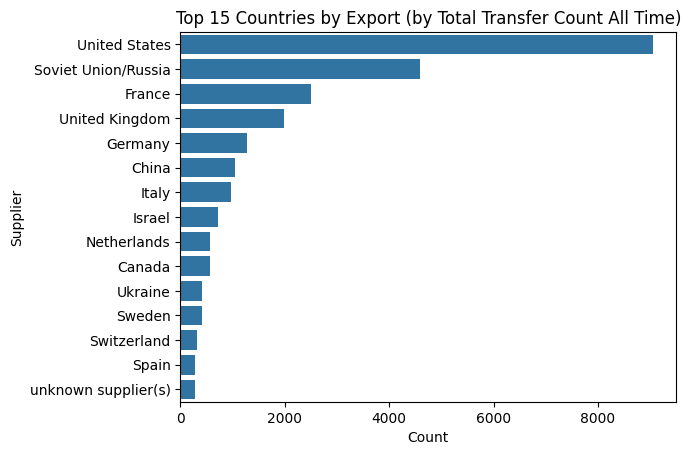

In [33]:
data['Supplier'] = data['Supplier'].replace(['Soviet Union', 'Russia'], 'Soviet Union/Russia')

top_exporters = (data.loc[:, ['Supplier']]
             .value_counts()
             .reset_index(name = 'Count'))

exporttop15 = top_exporters.head(15)

sns.barplot(data = exporttop15, y = 'Supplier', x = 'Count', orient = 'h')
plt.title('Top 15 Countries by Export (by Total Transfer Count All Time)')

len(data)

Looking at the distribution of total arms exports by country, it is clear that countries like the United States, Soviet Union, and western European power dominates the faciliation of arms to other countries. The United States alone, comprises ~ 30% of all arms exports, while the Soviet Union, United Kingdom, and France all individually account for more than 5% themselves. But to understand the bigger picture, and derive the geopolitical context of these transfers, it is just as important to understand to analyze where these weapons went and when they did to see how the world has changed over the last 75 years.

Text(0.5, 1.0, 'Top 15 Countries by Imports (by Total Transfer Count All Time)')

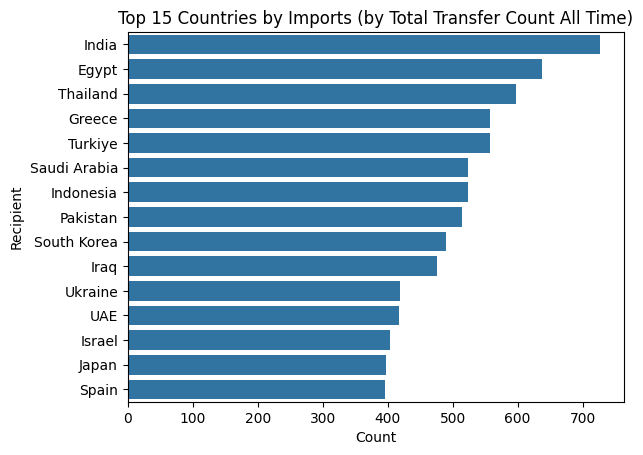

In [34]:
top_importers = (data.loc[:, ['Recipient']]
             .value_counts()
             .reset_index(name = 'Count'))
importtop15 = top_importers.head(15)

sns.barplot(data = importtop15, y = 'Recipient', x = 'Count', orient = 'h')
plt.title('Top 15 Countries by Imports (by Total Transfer Count All Time)')

Looking at the countries that have received the most weapons transfers, several countries with known significant conflicts stand out immediately. Areas like Egypt in its conflifcts with the Arab-Israeli Wars, Iraq with the conflicts in the Middle East of the 2000s, and more recently, the Russian invasian of Ukraine highlight the geopolitical significance of these transfers. However, to understand where and why these transfers happened, it would be even more important to understand and connect where the countries with top importers sent their weapons to highlight any relevant geopolitical alliances, as well as when these conflicts happened in order to understand their historical significance. 

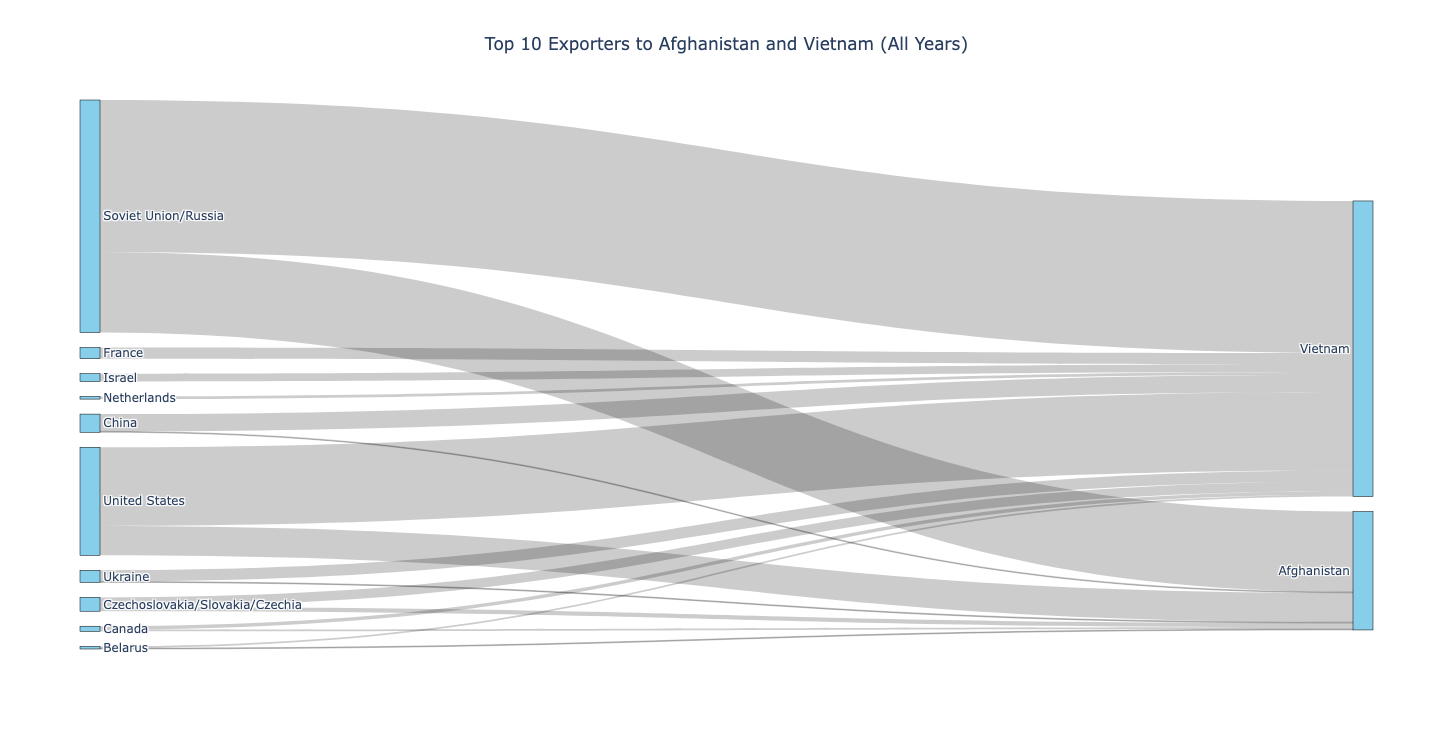

In [35]:
import plotly.graph_objects as go
from IPython.display import Image

data['Recipient'] = data['Recipient'].replace(['Viet Nam', 'South Vietnam'], 'Vietnam')

data['Supplier'] = data['Supplier'].replace(['Soviet Union', 'Russia'], 'Soviet Union/Russia')
data['Supplier'] = data['Supplier'].replace(['Slovakia', 'Czechia', 'Czechoslovakia'], 'Czechoslovakia/Slovakia/Czechia')

sankeydiagram = data[data['Recipient'].isin(['Afghanistan', 'Vietnam'])]

sankey_counts = (
    sankeydiagram.groupby(['Supplier', 'Recipient'])
    .size()
    .reset_index(name = 'Count')
)

top10sankey = (
    sankey_counts.groupby('Supplier')['Count']
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .index
)

top10df = sankey_counts[sankey_counts['Supplier'].isin(top10sankey)]

exporters = top10df['Supplier'].unique().tolist()
recipients = top10df['Recipient'].unique().tolist()
nodes = exporters + recipients

nodeMap = {}
index = 0
for name in nodes:
    nodeMap[name] = index
    index += 1

sources = top10df['Supplier'].map(nodeMap).astype(int).tolist()
targets = top10df['Recipient'].map(nodeMap).astype(int).tolist()
values = top10df['Count'].astype(float).tolist()

fig = go.Figure(data = [go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = nodes,
        color = "skyblue"
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values
    ))])

fig.update_layout(
    title_text = "Top 10 Exporters to Afghanistan and Vietnam (All Years)",
    font_size = 12, 
    title_x = 0.5)

fig.write_html("sankey.html")
Image("sankey.png")

Looking specifically at the countries that exported the most, and identifying the recipients of these weapons, it begins to become abundantly clear that the top recipients of arms transfers represent political alliances, and stances on some of the largest political conflicts the world has seen in the past and today. For example, the United States has been known to have some of its closest allies in South Korea and Japan, most notably in large part due to the presence of states like Russia and North Korea, which have posed significant threats, especially in its nuclear weapons program. Other countries, like Taiwan and Israel, represent key American stances in tensions in Southeast Asia and in the Middle East, much of which can be attributed to the rise of Chinese influence in the South China Sea and the presence of a key American ally in the Middle East surrounded by Arab states. Similarly, for the Soviet Union, many of its weapons transfer destinations represent opposing alliances to the United States, pointing to areas like East Germany and Syria as an extension of its desire to expand its military presence and influence beyond its own borders. Specifically looking at Afghanistan and Vietnam, the site of two major American conflicts in recent years, the Soviet Union/Russia and the United States both served as major players, albeit on different sides of conflict. 

In [36]:
# Total US transfers
usTotal = len(data[data['Supplier'] == 'United States'])
print(f"Total US transfers: {usTotal}")

# Number of Recipients
us_uniqueRecipients = data[data['Supplier'] == 'United States']['Recipient'].nunique()
print(f"Number of unique recipients: {us_uniqueRecipients}")

# Top 5 Total
us_top5Total = data[data['Supplier'] == 'United States']['Recipient'].value_counts().head(5).sum()
print(f"Top 5 recipients total: {us_top5Total}")
print(f"Percentage of all US transfers: {100 * us_top5Total / usTotal:.1f}%")

Total US transfers: 9048
Number of unique recipients: 176
Top 5 recipients total: 1618
Percentage of all US transfers: 17.9%


However, it is worth noting that while countries like the United States and the Soviet Union had more frequent, and different trade partners due to political alliances, it is also important to understand the total distribution within each country. For example, although the United States has over 9,000 transfers, there are 177 unique recipients, with a relatively wide distribution of weapons transfers across many destinations. As the top five recipients of weapons only comprise 18% of all transfers from the United States, it is clear that the United States is not only involved all across the planet, but our group recognizes that, as we look to project supplier-recipient forecasts, there is a significant amount of variance in the arms trade.

To further explore these patterns, our group found it important to place the context of these weapons transfers in the time that they occurred. The graph below depicts the major weapons transfers overlaid with significant events in world history that significantly influenced the arms trade itself. In identifying the major world powers, looking at countries like the United States, Russia/Soviet Union, and China, as well as identifying key landmarks of the last 50-75 years, like the height of the Cold War, the fall of the Soviet Union, and rise of Chinese influence, we aim to project the future of the arms trade by first looking to the past.


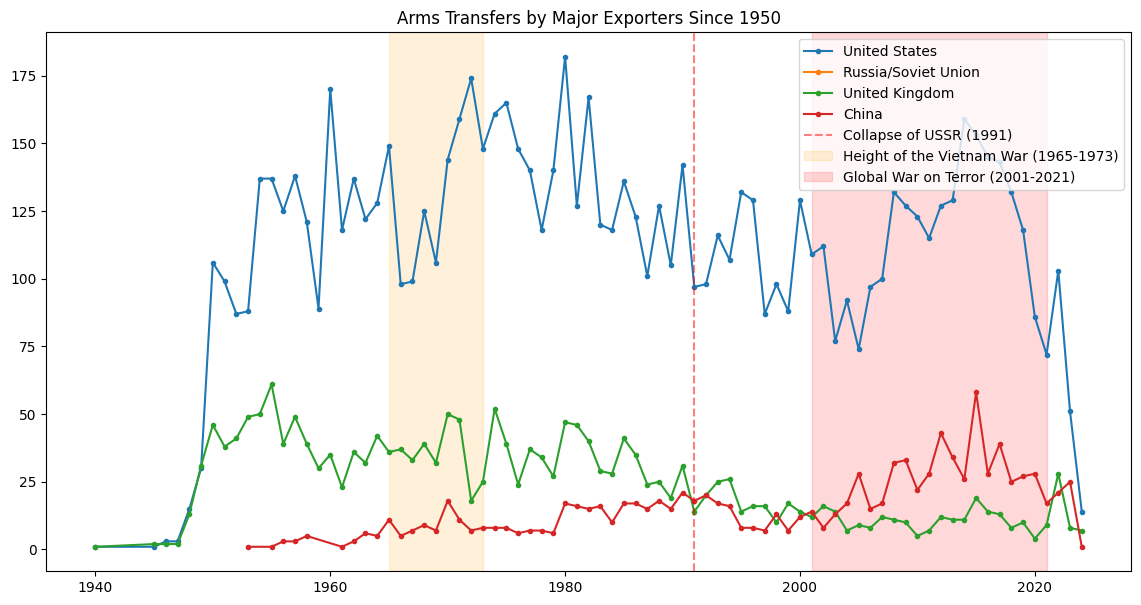

In [37]:
data2 = data.copy() 

data2['SupplierOverTime'] = data2['Supplier'].replace({'Soviet Union': 'Russia/Soviet Union', 
                                                        'Russia': 'Russia/Soviet Union'})

export_countries = ['United States', 'Russia/Soviet Union', 'United Kingdom', 'China']

data3 = (data2[data2['SupplierOverTime'].isin(export_countries)]
                   .groupby(['Year of order', 'SupplierOverTime'])
                   .size()
                   .reset_index(name='Count'))

plt.figure(figsize = (14, 7)) 

for exporter in export_countries:
    exporterInfo = data3[data3['SupplierOverTime'] == exporter]
    plt.plot(exporterInfo['Year of order'], exporterInfo['Count'], 
             marker = 'o', markersize = 3, label = exporter)
    
plt.axvline(x = 1991, color = 'red', linestyle = '--', alpha = 0.5, label = 'Collapse of USSR (1991)')
plt.axvspan(1965, 1973, color = 'orange', alpha = 0.15, label = 'Height of the Vietnam War (1965-1973)')
plt.axvspan(2001, 2021, color = 'red', alpha = 0.15, label = 'Global War on Terror (2001-2021)')

plt.title('Arms Transfers by Major Exporters Since 1950')
plt.legend(fontsize=10)
plt.show()

Geopolitical tensions from the Cold War fueled the subsequent rise in major weapons transfers, especially in the 1960s and 1970s, from the Vietnam War, and correspondingly fell off with the fall of the Berlin Wall and the disintegration of the Soviet Union into the countries we know today. Also, the group highlighted notable increases as a result of the 9/11 attacks in New York City and the ensuing War on Terror.

## Question 3

In [13]:
markov_data = data[["Recipient", "Year of order", "SIPRI TIV for total order"]].dropna()

In [14]:
markov_data["Support"] = pd.qcut(
    markov_data["SIPRI TIV for total order"],
    q=[0, 0.4, 0.8, 1.0],
    labels=["Low", "Medium", "High"]
)

In [15]:
def transition_matrix(series):
  series = series.dropna()
  states = sorted(set(series))
  matrix = pd.DataFrame(0, index=states, columns=states, dtype=float)

  for i in range(len(series) - 1):
    a = series.iloc[i]
    b = series.iloc[i + 1]
    matrix.loc[a, b] += 1

  matrix = matrix.div(matrix.sum(axis=1), axis=0).fillna(0)
  return matrix

In [16]:
test_df = markov_data[markov_data["Recipient"].isin(["Viet Nam", "South Vietnam", "Viet Cong (South Vietnam)*", "Viet Minh (France)*"])]
test_df

,Recipient,Year of order,SIPRI TIV for total order,Support
21974,South Vietnam,1962.0,75.00,High
21975,South Vietnam,1966.0,9.60,Low
21976,South Vietnam,1963.0,6.30,Low
21977,South Vietnam,1967.0,75.00,High
21978,South Vietnam,1967.0,1270.00,High
...,...,...,...,...
27927,Viet Nam,1979.0,15.00,Medium
27928,Viet Nam,1979.0,36.25,Medium
27929,Viet Nam,1980.0,40.00,Medium
27930,Viet Nam,1979.0,15.00,Medium


In [17]:
vietnam_aliases = [
    "Viet Nam",
    "South Vietnam",]

markov_data["Recipient"] = markov_data["Recipient"].replace(vietnam_aliases, "Vietnam")
markov_data["Recipient"].unique()

array(['Afghanistan', 'African Union**', 'Albania', 'Algeria',
       'Amal (Lebanon)*', 'ANC (South Africa)*', 'Angola',
       'Anti-Castro rebels (Cuba)*', 'Antigua and Barbuda', 'Argentina',
       'Armas (Guatemala)*', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Biafra',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Contras (Nicaragua)*',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'Darfur rebels (Sudan)*', 'Denmark',
       'Djibouti', 'Dominican Republic', 'DR Congo', 'East Germany (GDR)',
       'Ecuador', 'Egypt', 'El Salvador', 'ELF (Ethiopia)*',
       'EPLF (Ethiopia)*', 'Equatorial

Transition Matrix for Vietnam:
            High       Low    Medium
High    0.344828  0.181034  0.474138
Low     0.231707  0.195122  0.573171
Medium  0.351852  0.271605  0.376543


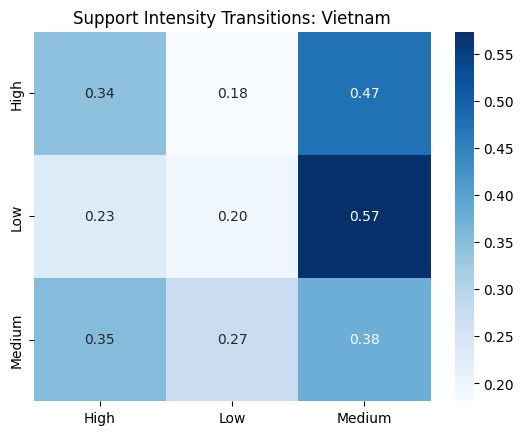

In [20]:
#Analyze One Country
country = "Vietnam"
country_data = markov_data[markov_data["Recipient"] == country].sort_values("Year of order")

matrix = transition_matrix(country_data["Support"])
print(f"Transition Matrix for {country}:")
print(matrix)

sns.heatmap(matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title(f"Support Intensity Transitions: {country}")
plt.show()


--- Pre-War Transitions ---
             Low    Medium
Low     0.700000  0.300000
Medium  0.285714  0.714286

--- War Period Transitions ---
            High       Low    Medium
High    0.461538  0.246154  0.292308
Low     0.309524  0.142857  0.547619
Medium  0.293333  0.253333  0.453333

--- Post-War Transitions ---
            High       Low    Medium
High    0.215686  0.117647  0.666667
Low     0.266667  0.200000  0.533333
Medium  0.397436  0.230769  0.371795


/var/folders/gv/nhwh5kcx6lv1pcx_npbt04gw0000gn/T/ipykernel_55728/2853818155.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pre = df_germany[pre_war & (markov_data["Recipient"] == country)].sort_values("Year of order")
/var/folders/gv/nhwh5kcx6lv1pcx_npbt04gw0000gn/T/ipykernel_55728/2853818155.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  during = df_germany[war & (markov_data["Recipient"] == country)].sort_values("Year of order")
/var/folders/gv/nhwh5kcx6lv1pcx_npbt04gw0000gn/T/ipykernel_55728/2853818155.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  post = df_germany[post_war & (markov_data["Recipient"] == country)].sort_values("Year of order")


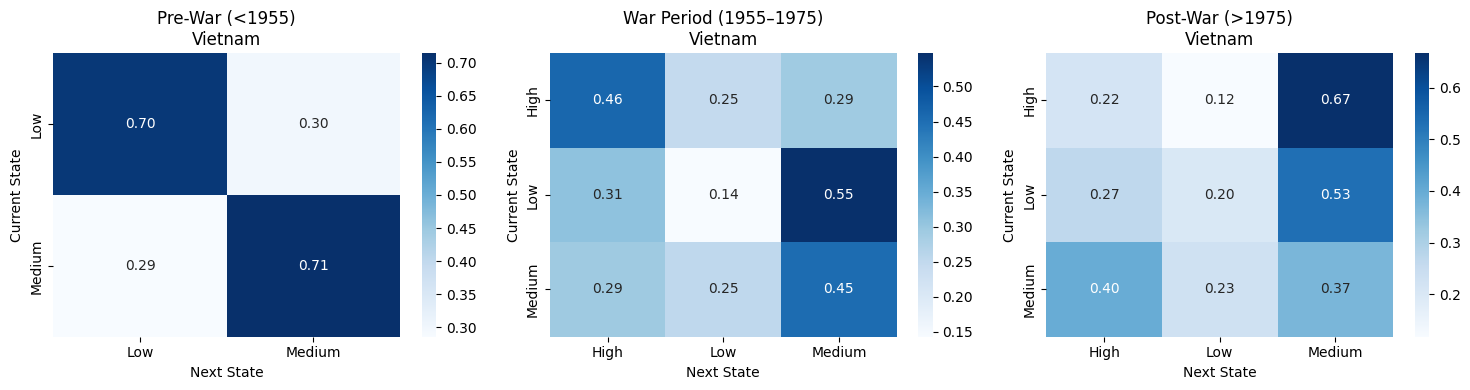

In [21]:
pre_war = (markov_data["Year of order"] <= 1954)
war = (markov_data["Year of order"].between(1955, 1975))
post_war = (markov_data["Year of order"] >= 1976)

country = "Vietnam"


df_germany = markov_data[markov_data["Recipient"] == country]

pre = df_germany[pre_war & (markov_data["Recipient"] == country)].sort_values("Year of order")
during = df_germany[war & (markov_data["Recipient"] == country)].sort_values("Year of order")
post = df_germany[post_war & (markov_data["Recipient"] == country)].sort_values("Year of order")


tm_pre = transition_matrix(pre["Support"])
tm_during = transition_matrix(during["Support"])
tm_post = transition_matrix(post["Support"])


print("\n--- Pre-War Transitions ---")
print(tm_pre)
print("\n--- War Period Transitions ---")
print(tm_during)
print("\n--- Post-War Transitions ---")
print(tm_post)


fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, tm, title in zip(axes, [tm_pre, tm_during, tm_post],
                         ["Pre-War (<1955)", "War Period (1955–1975)", "Post-War (>1975)"]):
    sns.heatmap(tm, annot=True, cmap="Blues", fmt=".2f", ax=ax)
    ax.set_title(f"{title}\n{country}")
    ax.set_xlabel("Next State")
    ax.set_ylabel("Current State")

plt.tight_layout()
plt.show()

## Question 4

In [22]:
STATE_ORDER = ["Low", "Medium", "High"]

markov_data["Support"] = pd.Categorical(markov_data["Support"],
                                        categories=STATE_ORDER,
                                        ordered=True)

def normalize_rows(df_tm: pd.DataFrame) -> pd.DataFrame:
    return df_tm.div(df_tm.sum(axis=1), axis=0).fillna(0)

tm_pre = normalize_rows(tm_pre.reindex(index=STATE_ORDER, columns=STATE_ORDER, fill_value=0))
tm_during = normalize_rows(tm_during.reindex(index=STATE_ORDER, columns=STATE_ORDER, fill_value=0))
tm_post = normalize_rows(tm_post.reindex(index=STATE_ORDER, columns=STATE_ORDER, fill_value=0))

In [23]:
afghan_aliases = [
    "Afghanistan",
    "Mujahedin (Afghanistan)*",
    "Northern Alliance (Afghanistan)*"]

af_df = markov_data.copy()
af_df["Recipient"] = af_df["Recipient"].replace(afghan_aliases, "Afghanistan")

af_df = af_df[af_df["Recipient"] == "Afghanistan"].sort_values("Year of order")

af_pre = af_df[af_df["Year of order"] <= 2000].copy()
af_war = af_df[(af_df["Year of order"] >= 2001) & (af_df["Year of order"] <= 2021)].copy()

def state_props(series):
    vc = series.value_counts().reindex(STATE_ORDER, fill_value=0).to_numpy()
    return vc / vc.sum() if vc.sum() > 0 else np.zeros(len(STATE_ORDER))

props_af_pre_actual = state_props(af_pre["Support"])
props_af_war_actual = state_props(af_war["Support"])

print("Afghanistan (actual) pre-war props [Low, Medium, High]:", np.round(props_af_pre_actual, 3))
print("Afghanistan (actual) war props   [Low, Medium, High]:", np.round(props_af_war_actual, 3))


Afghanistan (actual) pre-war props [Low, Medium, High]: [0.284 0.411 0.305]
Afghanistan (actual) war props   [Low, Medium, High]: [0.397 0.397 0.205]


In [24]:
rng = np.random.default_rng(42)
def simulate_markov_df(tm_df: pd.DataFrame, start_state: str, T: int, rng) -> list:
    states = list(tm_df.index)
    seq = [start_state]
    for _ in range(T - 1):
        p = tm_df.loc[seq[-1], states].to_numpy()
        seq.append(rng.choice(states, p=p))
    return seq

def simulate_many(tm_df: pd.DataFrame, T: int, N: int = 2000, start_state: str | None = None, rng=None) -> np.ndarray:
    rng = np.random.default_rng() if rng is None else rng
    states = list(tm_df.index)
    if start_state is None:
        v = np.ones(len(states)) / len(states)
        P = tm_df.loc[states, states].to_numpy()
        for _ in range(200):
            v = v @ P
        pi = v / v.sum()
    else:
        pi = np.eye(len(states))[states.index(start_state)]

    sims = []
    for _ in range(N):
        s0 = rng.choice(states, p=pi)
        sims.append(simulate_markov_df(tm_df, s0, T, rng))
    return np.array(sims)

In [25]:
start_pre = af_pre["Support"].iloc[0] if len(af_pre) else STATE_ORDER[0]
start_war = af_war["Support"].iloc[0] if len(af_war) else STATE_ORDER[0]

S_pre = simulate_many(tm_pre, T=len(af_pre),  N=2000, start_state=start_pre, rng=rng)
S_war = simulate_many(tm_during, T=len(af_war), N=2000, start_state=start_war, rng=rng)

def summarize_props(sim_seqs: np.ndarray) -> np.ndarray:
    props = []
    for seq in sim_seqs:
        s = pd.Series(seq, dtype="category")
        vc = s.value_counts().reindex(STATE_ORDER, fill_value=0).to_numpy()
        props.append(vc / vc.sum() if vc.sum() else np.zeros(len(STATE_ORDER)))
    return np.vstack(props)

props_pre_sims = summarize_props(S_pre)
props_war_sims = summarize_props(S_war)

def ci95(arr):
    return np.percentile(arr, [2.5, 50, 97.5], axis=0)

lo_pre, med_pre, hi_pre   = ci95(props_pre_sims)
lo_war, med_war, hi_war   = ci95(props_war_sims)

,Actual (AFG ≤ 2000),Sim median (VN pre-war),Sim 95% low,Sim 95% high
Low,0.284,0.495,0.347,0.642
Medium,0.411,0.505,0.358,0.653
High,0.305,0.000,0.000,0.000


,Actual (AFG 2001–2021),Sim median (VN war),Sim 95% low,Sim 95% high
Low,0.397,0.231,0.154,0.321
Medium,0.397,0.410,0.295,0.526
High,0.205,0.346,0.231,0.474


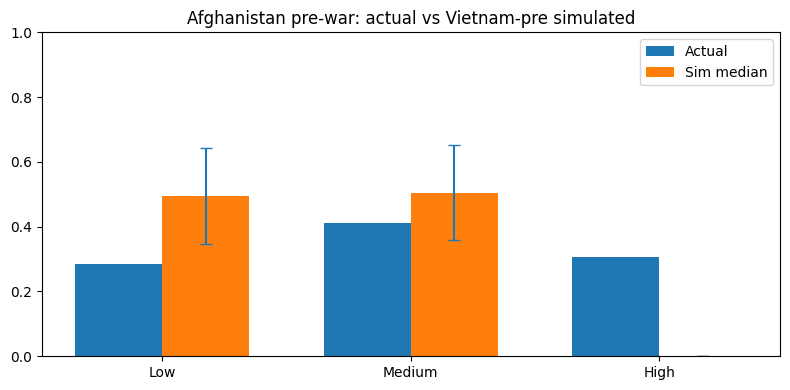

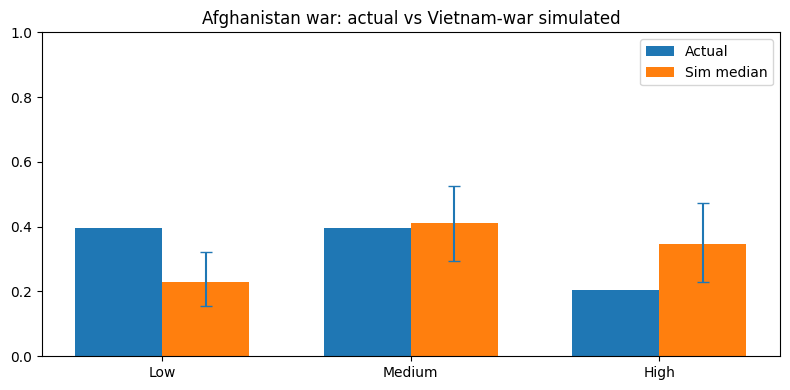

In [26]:
pre_table = pd.DataFrame({
    "Actual (AFG ≤ 2000)": props_af_pre_actual,
    "Sim median (VN pre-war)": med_pre,
    "Sim 95% low": lo_pre,
    "Sim 95% high": hi_pre
}, index=STATE_ORDER).round(3)

war_table = pd.DataFrame({
    "Actual (AFG 2001–2021)": props_af_war_actual,
    "Sim median (VN war)": med_war,
    "Sim 95% low": lo_war,
    "Sim 95% high": hi_war
}, index=STATE_ORDER).round(3)

display(pre_table)
display(war_table)

def plot_comp(actual, med, lo, hi, title):
    x = np.arange(len(STATE_ORDER))
    width = 0.35
    plt.figure(figsize=(8,4))
    plt.bar(x - width/2, actual, width, label='Actual')
    plt.bar(x + width/2, med, width, label='Sim median')
    yerr = np.vstack([med - lo, hi - med])
    plt.errorbar(x + width/2, med, yerr=yerr, fmt='none', capsize=4)
    plt.xticks(x, STATE_ORDER); plt.ylim(0, 1)
    plt.title(title); plt.legend(); plt.tight_layout(); plt.show()

plot_comp(props_af_pre_actual, med_pre, lo_pre, hi_pre,
          "Afghanistan pre-war: actual vs Vietnam-pre simulated")

plot_comp(props_af_war_actual, med_war, lo_war, hi_war,
          "Afghanistan war: actual vs Vietnam-war simulated")


In [27]:
def chi_square(p, q, eps=1e-9):
    p = np.asarray(p) + eps
    q = np.asarray(q) + eps
    return np.sum((p - q)**2 / q)

print("Chi-square distance (pre-war):", chi_square(props_af_pre_actual, med_pre))
print("Chi-square distance (war):    ", chi_square(props_af_war_actual, med_war))


Chi-square distance (pre-war): 93185595.67521587
Chi-square distance (war):     0.17822590149567322


Using the matrices derived from Vietnam, we simulated Afghanistan’s trade patterns for both its pre-war (before 2001) and war (2001–2021) periods, generating thousands of synthetic sequences to approximate its state distribution. We then compared the simulated proportions of states to Afghanistan’s actual data and evaluated model performance using confidence intervals and chi-square distance metrics. This approach allowed us to test whether Vietnam’s historical transition behavior could credibly explain Afghanistan’s arms trade dynamics.

In [29]:
afghan_alliases = [
    "Afghanistan",
    "Mujahedin (Afghanistan)*",
    "Northern Alliance (Afghanistan)*"]

markov_data["Recipient"] = markov_data["Recipient"].replace(afghan_alliases, "Afghanistan")
markov_data["Recipient"].unique()



array(['Afghanistan', 'African Union**', 'Albania', 'Algeria',
       'Amal (Lebanon)*', 'ANC (South Africa)*', 'Angola',
       'Anti-Castro rebels (Cuba)*', 'Antigua and Barbuda', 'Argentina',
       'Armas (Guatemala)*', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Biafra',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Contras (Nicaragua)*',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'Darfur rebels (Sudan)*', 'Denmark',
       'Djibouti', 'Dominican Republic', 'DR Congo', 'East Germany (GDR)',
       'Ecuador', 'Egypt', 'El Salvador', 'ELF (Ethiopia)*',
       'EPLF (Ethiopia)*', 'Equatorial

Transition Matrix for Afghanistan:
            High       Low    Medium
High    0.344828  0.181034  0.474138
Low     0.231707  0.195122  0.573171
Medium  0.351852  0.271605  0.376543


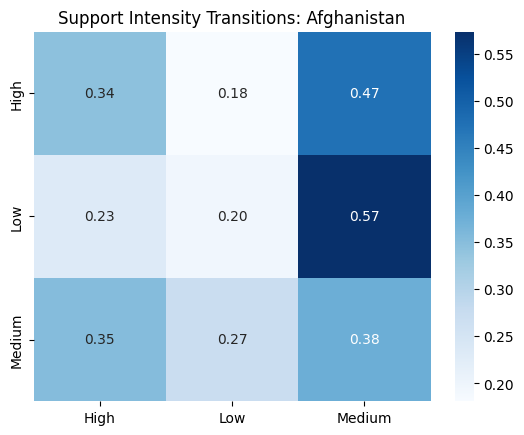

In [30]:
#Analyze One Country
country2 = "Afghanistan"
country_data2 = markov_data[markov_data["Recipient"] == country2].sort_values("Year of order")

matrix2 = transition_matrix(country_data["Support"])
print(f"Transition Matrix for {country2}:")
print(matrix2)

sns.heatmap(matrix2, annot=True, cmap="Blues", fmt=".2f")
plt.title(f"Support Intensity Transitions: {country2}")
plt.show()


--- Pre-War Transitions ---
            High       Low    Medium
High    0.379310  0.275862  0.344828
Low     0.259259  0.370370  0.370370
Medium  0.263158  0.236842  0.500000

--- War Period Transitions ---
            High       Low    Medium
High    0.250000  0.375000  0.375000
Low     0.200000  0.400000  0.400000
Medium  0.193548  0.419355  0.387097

--- Post-War Transitions ---
Empty DataFrame
Columns: []
Index: []


/var/folders/gv/nhwh5kcx6lv1pcx_npbt04gw0000gn/T/ipykernel_55728/1314107867.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pre2 = df_afghan[pre_war2 & (markov_data["Recipient"] == country2)].sort_values("Year of order")
/var/folders/gv/nhwh5kcx6lv1pcx_npbt04gw0000gn/T/ipykernel_55728/1314107867.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  during2 = df_afghan[war2 & (markov_data["Recipient"] == country2)].sort_values("Year of order")
/var/folders/gv/nhwh5kcx6lv1pcx_npbt04gw0000gn/T/ipykernel_55728/1314107867.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  post2 = df_afghan[post_war2 & (markov_data["Recipient"] == country2)].sort_values("Year of order")


ValueError: zero-size array to reduction operation fmin which has no identity

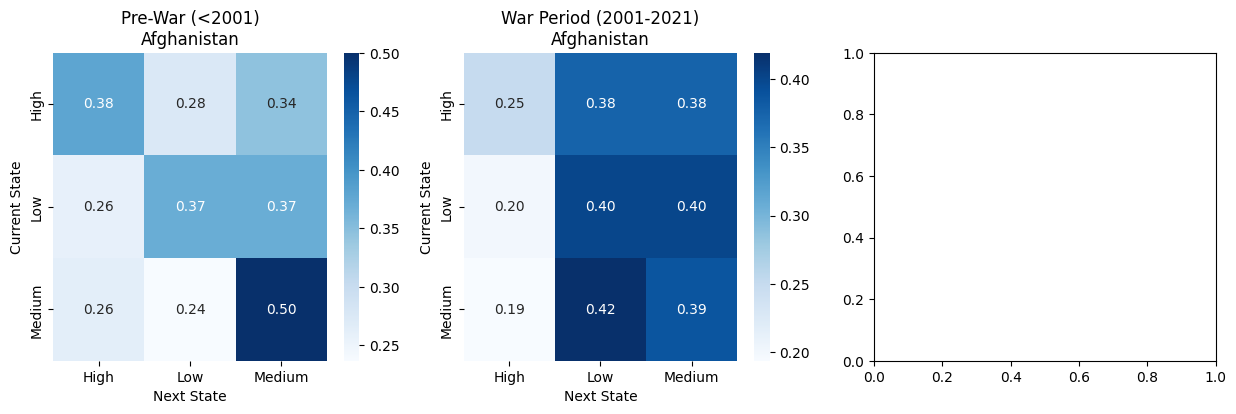

In [31]:
pre_war2 = (markov_data["Year of order"] <= 2000)
war2 = (markov_data["Year of order"].between(2001, 2021))
post_war2 = (markov_data["Year of order"] >= 2022)

country2 = "Afghanistan"


df_afghan = markov_data[markov_data["Recipient"] == country2]

pre2 = df_afghan[pre_war2 & (markov_data["Recipient"] == country2)].sort_values("Year of order")
during2 = df_afghan[war2 & (markov_data["Recipient"] == country2)].sort_values("Year of order")
post2 = df_afghan[post_war2 & (markov_data["Recipient"] == country2)].sort_values("Year of order")


tm_pre2 = transition_matrix(pre2["Support"])
tm_during2 = transition_matrix(during2["Support"])
tm_post2 = transition_matrix(post2["Support"])


print("\n--- Pre-War Transitions ---")
print(tm_pre2)
print("\n--- War Period Transitions ---")
print(tm_during2)
print("\n--- Post-War Transitions ---")
print(tm_post2)


fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, tm, title in zip(axes, [tm_pre2, tm_during2, tm_post2],
                         ["Pre-War (<2001)", "War Period (2001-2021)", "Post-War (>2021)"]):
    sns.heatmap(tm, annot=True, cmap="Blues", fmt=".2f", ax=ax)
    ax.set_title(f"{title}\n{country2}")
    ax.set_xlabel("Next State")
    ax.set_ylabel("Current State")

plt.tight_layout()
plt.show()

## Question 5

The simulated sequences for Afghanistan only partially share the properties of the Vietnam training data. When using the Vietnam pre-war transition matrix, the generated Afghanistan pre-war sequences fail to reproduce the frequency of high-intensity import years because the Vietnam pre-war data itself contained almost no transitions into the “High” state, leading to an underestimation of major import events. In contrast, sequences generated from the Vietnam war-period matrix more closely resemble Afghanistan's wartime dynamics, as both exhibit persistent medium-to-high import states and similar state proportions that almost fall within the simulated 95% confidence intervals. While the war-period estimates are credible, with a small chi-square distance indicating a good fit, there remains substantial uncertainty due to small sample sizes, wide confidence bands, and differences in geopolitical context between the two countries. Overall, the model captures the general wartime behavior of sustained arms inflows but lacks reliability for pre-war conditions, as the Vietnam data do not adequately represent Afghanistan's earlier arms trade patterns.

## Question 6

Limitations and Caveats 

1. The Markov assumption is not completely realistic. Arms-provision depends on multi-year contracting processes, logistical availability, and political dynamics. A Markov chain assumes that the next state of a system depends only on its current state, not on the sequence of events that came before. As such, a first-order MC ignores these longer lags and would require higher-order Markov chains to more realistically model the complexity.

2. Political and temporal incomparability. Vietnam’s Cold War context differs structurally from the post-2001 Afghanistan context. The geopolitical calculus of strategic competition between the US and USSR shaped supplier choices and volumes in ways that do not map neatly onto the multipolar 2001–2021 environment (NATO/coalition donors, different supplier mix). As such, transition probabilities learned from South Vietnam are not definitive.

3. SIPRI coverage limits: SIPRI focuses on major conventional arms and omits a large share of small arms/light weapons, covert transfers, security-assistance contract spending, logistics, and development support—all critical elements of  comprehensive assistance to South Vietnam and Afghanistan. Relying only on SIPRI misses those channels, so combining SIPRI with other datasets (e.g., USAID and Foreign Military Financing (FMF) records, congressional reports, etc.) would more accurately capture the full support picture.  

4. SIPRI naming conventions: Inconsistent country naming within the SIPRI database introduces uncertainty into data accuracy and aggregation. For example, the dataset lists “Viet Nam,” “South Vietnam,” and “Viet Cong (South Vietnam)” as separate entities, which complicates efforts to capture a unified record of U.S. transfers to South Vietnam. These variations suggest possible discrepancies in how the original data were categorized or recorded, leading to potential duplication or omission during analysis.

5. Limited sample size. The South Vietnam era is one historical case, so the derived transition matrix risks overfitting and poor out-of-sample performance. Mitigation would require pooling training data across multiple comparable cases (U.S. support to other partner states in Cold War/post-Cold War settings).


Future Potential
Arms transfer data, such as that provided by the SIPRI database, enables non-parametric modeling of broader patterns of inter-state competition and conflict. Such analyses hold significant value for both policymakers and academic researchers. Three promising future applications include:

1. Conflict Intensity Visualization — Mapping historical global arms transfer patterns to identify potential future hotspots where military buildups may escalate into low-intensity conflict or open warfare.

2. Conflict Stabilization Dynamics — Modeling the trajectory of military activity in states currently engaged in, or at risk of entering, stabilization or counterinsurgency operations.

3. Strategic Competition at Maritime & Land Chokepoints — Predicting how states may use arms transfers to influence nations controlling key geographic chokepoints such as major canals, straits, and transit corridors.
